# 參考程式碼 :
https://lmfit.github.io/lmfit-py/model.html

In [9]:
from sklearn import datasets
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import numpy.random as random

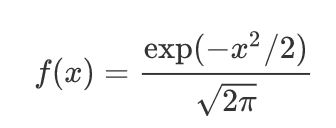

In [10]:
from numpy import sqrt, pi, exp, linspace, random

def gaussian(x, amp, cen, wid):
    return amp * exp(-(x-cen)**2 /wid)

In [11]:
from scipy.optimize import curve_fit
x = linspace(-100,100, 1000)

In [13]:
from scipy.stats import norm

# y = gaussian(x, 2.33, 0, 10) + random.normal(0, 0.2, len(x))
y = norm.pdf(x,0,10)*100 + random.normal(0, 0.5, len(x))

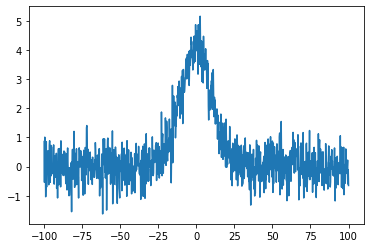

In [14]:
plt.plot(x,y)

In [15]:
from scipy.optimize import curve_fit


In [16]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

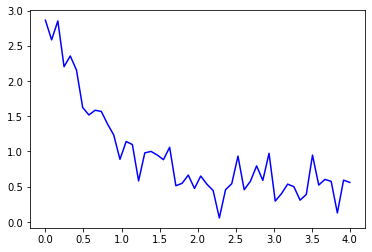

In [17]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

fit: a=2.554, b=1.352, c=0.475


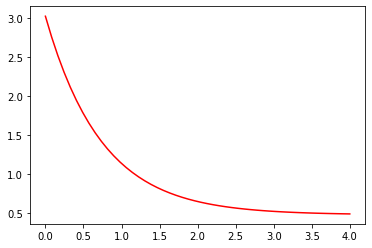

In [18]:
popt, pcov = curve_fit(func, xdata, ydata)


plt.label ='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt)
print(plt.label)
plt.plot(xdata, func(xdata, *popt), 'r-')


# sklearn.calibration.calibration_curve
這個問題在風控和ctr領域比較常見，風控對模型預測的真實概率是比較看重的。例如：

一些銀行或者P2P公司會建立機器學習模型來估計拒絕借貸的概率，通過設置閾值以自動過濾一批借貸請求。假設我們對10000個預測概率為0.2左右的用戶進行放款，我們通過預測概率為0.2認為這10000個用戶中將來有8000個左右能夠按時還款付息，而剩下的2000個可能違約賴賬成為死賬戶，這個時候金融機構，尤其是銀行，就要根據這種情況進行一些壞賬準備，同時根據用戶被預測出來的概率，金融機構還會對不同概率區間的用戶設置不同的利率，利率的計算建立在用戶的預測概率上。但是如果模型根本沒法反應真實的概率，這些決策都會受到很大的影響，所以我們需要進行概率校準以使得模型的預測概率和真實概率對應起來
* 一些參考文章 : https://zhuanlan.zhihu.com/p/82670834
* Reliability Curve: 從下方向的圖可以看出 logistic regresion 和 navie bayse 是相對較穩定的。不並會激化偏向兩側。但是 SVM 及 Radnom Forest 相對來說就比較偏激
<img src='https://i.imgur.com/UdHMhtZ.png' width=80% />

In [39]:
import numpy as np
from sklearn.calibration import calibration_curve
y_true = np.array([0,     0,   0,   0,    1,   1,   1,   1,  1])
y_pred = np.array([0.1, 0.2, 0.3, 0.4, 0.65, 0.7, 0.8, 0.9,  1.])
prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=3)


In [40]:
prob_true



array([0. , 0.5, 1. ])

In [41]:
prob_pred

array([0.2  , 0.525, 0.85 ])